In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
from stl import mesh
import matplotlib.pyplot as plt
import re

In [2]:
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(fr'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [3]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]


In [4]:
lambdas = np.array([10,2.5])

Error processing H:\phd stuff\tidy3d\Notebooks\LSU Project\20250908 Hollow Rods\Structures: 'NoneType' object has no attribute 'group'
Configured successfully.


16:30:54 W. Europe Daylight Time Created task                                   
                                 'LSU_ffr_0.2_size_1_n_3.42_ffh_0.0000' with    
                                 task_id                                        
                                 'fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=183629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=785104;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\task]8;;\
                                 ]8;id=785104;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\Id]8;;\]8;id=183629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\=]8;;\]8;id=406002;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\fdve]8;;\]8;id=183629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\-c22276f7-dbaa-4ace-a997-60c36d1f4990']8;;\.

                                 Task folder: ]8;id=157145;https://tidy3d.simulation.cloud/folders/folder-2c39ad17-f361-418c-9afe-edfe3d40986b\'202509010 Florescu LSU ]8;;\          
                                 ]8;id=157145;https://tidy3d.simulation.cloud/folders/folder-2c39ad17-f361-418c-9afe-edfe3d40986b\Transmission T]8;;\]8;id=666023;https://tidy3d.simulation.cloud/folders/folder-2c39ad17-f361-418c-9afe-edfe3d40986b\(]8;;\]8;id=157145;https://tidy3d.simulation.cloud/folders/folder-2c39ad17-f361-418c-9afe-edfe3d40986b\L]8;;\]8;id=666023;https://tidy3d.simulation.cloud/folders/folder-2c39ad17-f361-418c-9afe-edfe3d40986b\)]8;;\]8;id=157145;https://tidy3d.simulation.cloud/folders/folder-2c39ad17-f361-418c-9afe-edfe3d40986b\ Hollow rods']8;;\.

Output()

16:31:33 W. Europe Daylight Time Maximum FlexCredit cost: 2.837. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

<Figure size 1280x960 with 0 Axes>

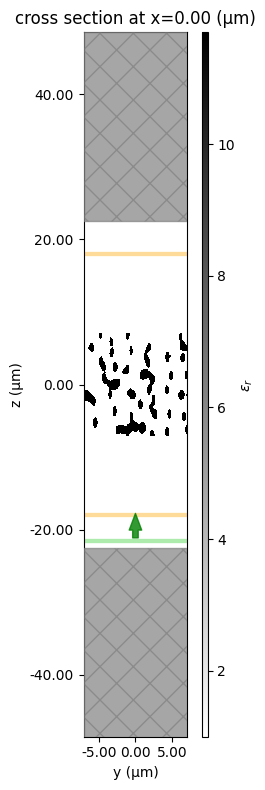

<Figure size 1600x1200 with 0 Axes>

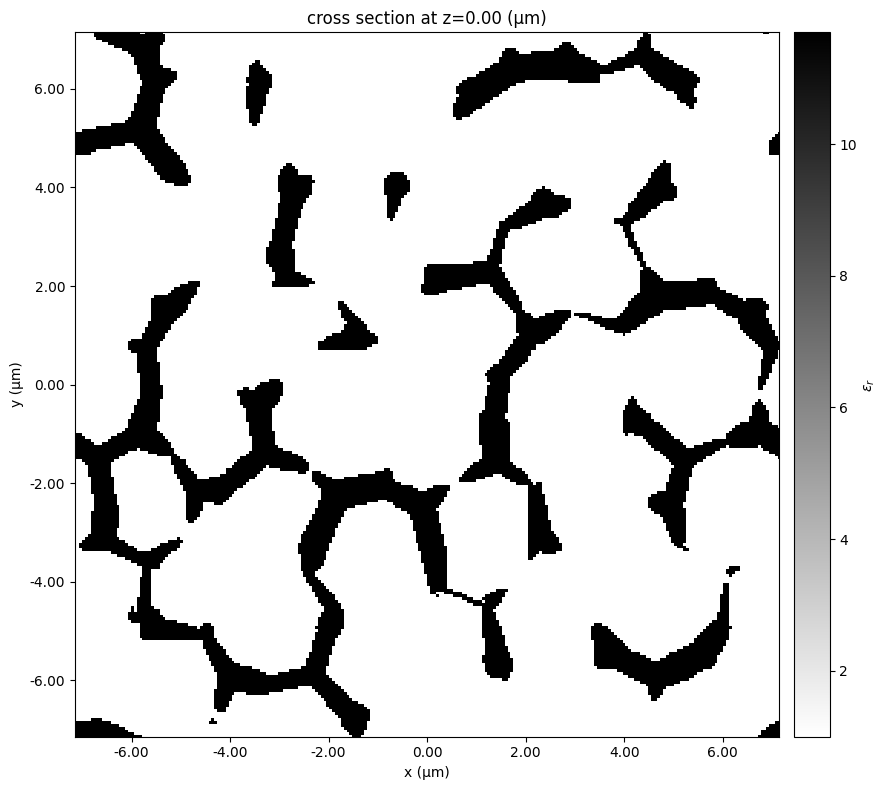

<Figure size 640x480 with 0 Axes>

16:31:40 W. Europe Daylight Time status = queued

                                 To cancel the simulation, use                  
                                 'web.abort(task_id)' or 'web.delete(task_id)'  
                                 or abort/delete the task in the web UI.        
                                 Terminating the Python script will not stop the
                                 job running on the cloud.

Output()

16:31:54 W. Europe Daylight Time status = preprocess

16:32:07 W. Europe Daylight Time starting up solver

                                 running solver

Output()

16:37:36 W. Europe Daylight Time status = postprocess

Output()

16:37:42 W. Europe Daylight Time status = success

16:37:44 W. Europe Daylight Time View simulation result at                      
                                 ]8;id=293586;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=76920;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\task]8;;\
                                 ]8;id=76920;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\Id]8;;\]8;id=293586;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\=]8;;\]8;id=666975;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\fdve]8;;\]8;id=293586;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c22276f7-dbaa-4ace-a997-60c36d1f4990\-c22276f7-dbaa-4ace-a997-60c36d1f4990']8;;\.

Configured successfully.
Exist!
Configured successfully.
Exist!
Configured successfully.
Exist!
Configured successfully.
Exist!


In [5]:
folder_path = rf"H:\phd stuff\tidy3d\Notebooks\LSU Project\20250908 Hollow Rods\Structures"
project_name = "202509010 Florescu LSU Transmission T(L) Hollow rods"
postprocess_results = []
runtime_ps = 25e-12
min_steps_per_lambda = 20
# cuts = [0.07,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.3,1.5,1.7]
cuts=[1]
h5_bg = None
ref = True
for direction in ["z"]: 
    for dirpath, dirnames, filenames in os.walk(folder_path):
        try:
            n_value = float(re.search(r'n_([+-]?\d+(?:\.\d+)?)', dirpath).group(1))
            for filename in filenames:
                if filename=="n_3.42_ff_0.20_mean_minor_rad_0.27_aspec_2.53.h5":
                    continue
                if filename.endswith(".h5"):
                    ff = float(re.search(r'ffr_([+-]?\d+(?:\.\d+)?)', filename).group(1))
                    ffh = float(re.search(r'ffh_([+-]?\d+(?:\.\d+)?)', filename).group(1))
                    for cut in cuts:
                        if not (Path(filename).suffix==".h5" or Path(filename).suffix==".stl"):
                            continue 
                        if os.path.isfile(os.path.join(dirpath, filename)):
                            file=os.path.join(dirpath, filename)
                            structure_1 = AM.loadAndRunStructure(key = tidy3dAPI, file_path=file
                                                            ,direction=direction, lambda_range=lambdas,
                                                            box_size=14.3,runtime_ps=runtime_ps,min_steps_per_lambda=min_steps_per_lambda,
                                                           scaling=1,shuoff_condtion=1e-20, verbose=True, 
                                                           monitors=["flux"], flux_monitor_position=18,cell_size_manual=45,
                                                           freqs=400, 
                                                           cut_condition=cut, source="planewave", absorbers=130, use_permittivity=False,sim_name=rf"{Path(filename).stem}_size_{cut}" + (rf"_bg_{h5_bg}" if h5_bg else ""),h5_bg=h5_bg,
                                                           )
                            folder_desc = rf"H:\phd stuff\tidy3d\data\{project_name}\n_{n_value:.2f}"
                            os.makedirs(folder_desc, exist_ok=True)
                            sim_name=rf"LSU_ffr_{ff}_size_{cut}_n_{n_value:.2f}_ffh_{ffh:.4f}"
                            if os.path.exists(os.path.join(folder_desc, sim_name+".txt")):
                                print("Exist!")
                            else:
                                id =web.upload(structure_1.sim, folder_name=project_name,task_name=sim_name, verbose=True)
                                structure_1.plot_sim_layout()
                                ids = '\n' + id
                                with open(os.path.join(folder_desc, sim_name+".txt"), "w") as file:
                                    # Write the string to the file
                                    file.write(ids)
                                web.start(task_id = id)
                                web.monitor(task_id=id,verbose=True)
                            del structure_1
                            # structure_1.estimate_cost()
                            # raise(Exception)


        except Exception as e:
            print(f"Error processing {dirpath}: {e}")
            continue
        
    

